<a href="https://colab.research.google.com/github/raghrao/NLP/blob/main/MonteCarlo_Simulation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from random import random

In [2]:
df=pd.read_excel('Raw_Data_Final.xlsx')

In [3]:
df[['vTitle','vAction','platform','model','deviceId','timestamp']].head()

,vTitle,vAction,platform,model,deviceId,timestamp
0,Screen Mirroring Detected!!!,Block,iOS,"iPhone15,3",1B04406D-D2FE-4803-9149-9D75A4F4995D,2023-10-18 15:08:26
1,Screen Mirroring Detected!!!,Block,iOS,"iPhone15,3",1B04406D-D2FE-4803-9149-9D75A4F4995D,2023-10-18 15:08:27
2,Screen Mirroring Detected!!!,Block,iOS,"iPhone14,6",8ADCAAFF-7EDB-4768-882F-343DA2E3B91C,2023-10-18 22:59:58
3,Screen Mirroring Detected!!!,Block,iOS,"iPhone14,8",D0F37196-6B89-47C9-9272-33EA1770C1A8,2023-10-19 13:18:30
4,Screen Mirroring Detected!!!,Block,iOS,"iPhone14,8",D0F37196-6B89-47C9-9272-33EA1770C1A8,2023-10-19 13:18:31


In [4]:
title_map = {
    "Proxy Server Detected!!!": "A2",
    "Application Debugging Detected!!!": "A3",
    "Debug Detected!!!": "A4",
    "Jailbreak Detected!!!": "A5",
    "Screen Mirroring Detected!!!": "A6",
    "Invalid Certificate Installation Detected!!!": "A7",
    "Rooting Detected!!!": "A8",
    "SuBinary Detected!!!": "A9",
    "BusyBoxBinary Detected!!!": "A10",
    "Debug Detecte!!!": "A11",
    "Alert 001 - Rooting Detected!!!": "A12",
    "Virtual Device Detected!!!": "A13",
    "Developer Mode Enabled!!!": "A14",
    "Code Injection Tool Detected!!!": "A15",
    "Active USB Connection Detected!!!": "A16",
    "Unsecured Wi-Fi Detected!!!": "A17",
    "Harmful App(s) Detected": "A18",
    "Alert 005 - Rooting Detected!!!": "A19",
    "Remitter risk score triggered fraud decline": "A20",
    "Beneficiary risk score triggered fraud decline": "A21",
    "No of PIN tries exceeded": "A22",
    "Account does not exist": "A23",
    "SSL Pinning Bypass Detected!!!":"A24",
    "App Tampering Detected!!!":"A25",
    "Alert 002 - Rooting Detected!!!":"A26",
    "SSL Pinning Bypass Detected Over VPN!!!":"A27"



}

In [5]:
df["Step"] = df["vTitle"].replace(title_map)

In [6]:
print(df['Step'].value_counts())

A24    2189
A16     279
A6      246
A8      156
A7      123
A13     115
A25      65
A12      55
A15      45
A2       37
A9       29
A14      28
A18      23
A10      22
A4       16
A27      15
A3       14
A19       9
A17       4
A5        4
A26       4
A11       1
Name: Step, dtype: int64


In [7]:
df[['vTitle','Step','vAction','platform','model','deviceId','timestamp']].head()

,vTitle,Step,vAction,platform,model,deviceId,timestamp
0,Screen Mirroring Detected!!!,A6,Block,iOS,"iPhone15,3",1B04406D-D2FE-4803-9149-9D75A4F4995D,2023-10-18 15:08:26
1,Screen Mirroring Detected!!!,A6,Block,iOS,"iPhone15,3",1B04406D-D2FE-4803-9149-9D75A4F4995D,2023-10-18 15:08:27
2,Screen Mirroring Detected!!!,A6,Block,iOS,"iPhone14,6",8ADCAAFF-7EDB-4768-882F-343DA2E3B91C,2023-10-18 22:59:58
3,Screen Mirroring Detected!!!,A6,Block,iOS,"iPhone14,8",D0F37196-6B89-47C9-9272-33EA1770C1A8,2023-10-19 13:18:30
4,Screen Mirroring Detected!!!,A6,Block,iOS,"iPhone14,8",D0F37196-6B89-47C9-9272-33EA1770C1A8,2023-10-19 13:18:31


[Text(0.5, 1.0, 'Step distribution')]

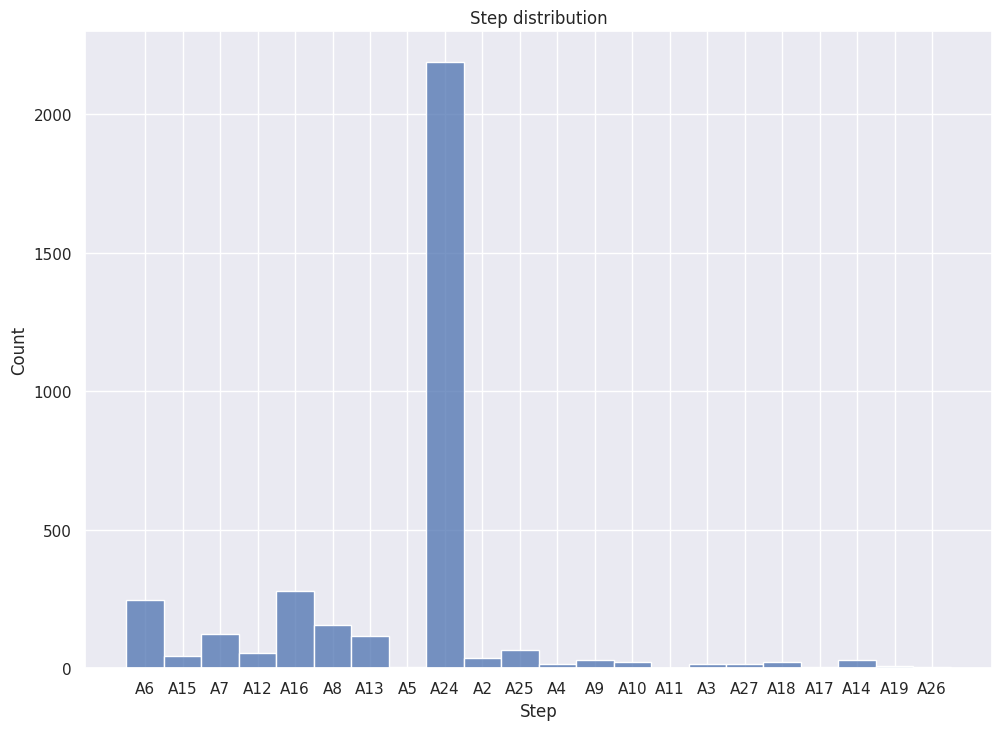

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['Step']).set(title='Step distribution')

In [9]:
df.deviceId.nunique()

759

In [10]:
deviceIds=df['deviceId'].unique()

In [11]:
from collections import defaultdict
d = defaultdict(dict)
for i in range(len(deviceIds)):
    df1=df[df.deviceId==deviceIds[i]].sort_values(by='timestamp', ascending=True)
    step_list = df1['Step'].tolist()
    for j in range(len(step_list)-1):
        keyA=step_list[j]
        keyB=step_list[j+1]
        key=(step_list[j],step_list[j+1])
        if ( keyA in d ) & ( keyB in d[keyA] ):
            d[keyA][keyB]=d[keyA][keyB]+1
        else :
            d[keyA][keyB]=1


In [12]:
print(d)

defaultdict(<class 'dict'>, {'A6': {'A6': 174, 'A2': 2, 'A16': 3, 'A24': 10, 'A17': 1, 'A18': 3}, 'A7': {'A12': 19, 'A15': 12, 'A8': 2, 'A16': 3, 'A7': 70, 'A18': 1, 'A6': 2}, 'A12': {'A8': 29, 'A2': 5, 'A16': 6, 'A10': 3, 'A7': 1, 'A12': 1, 'A9': 6, 'A18': 1, 'A14': 2, 'A26': 1}, 'A8': {'A9': 8, 'A12': 6, 'A7': 6, 'A16': 20, 'A15': 10, 'A10': 6, 'A2': 2, 'A8': 73, 'A19': 8, 'A18': 3, 'A14': 5, 'A26': 2}, 'A9': {'A16': 9, 'A7': 3, 'A8': 1, 'A10': 4, 'A12': 4, 'A14': 5}, 'A16': {'A8': 13, 'A7': 12, 'A16': 103, 'A15': 5, 'A9': 3, 'A12': 4, 'A24': 3, 'A6': 2, 'A10': 5, 'A14': 8, 'A18': 3}, 'A2': {'A12': 2, 'A8': 3, 'A16': 3, 'A2': 20, 'A6': 1, 'A15': 1, 'A13': 2}, 'A15': {'A8': 8, 'A2': 2, 'A7': 11, 'A12': 10, 'A16': 2, 'A15': 8, 'A13': 3}, 'A10': {'A9': 8, 'A16': 5, 'A8': 2, 'A15': 2, 'A12': 1, 'A18': 2, 'A14': 1}, 'A5': {'A24': 2}, 'A24': {'A24': 1669, 'A16': 3, 'A27': 5, 'A6': 11, 'A5': 1}, 'A13': {'A13': 81, 'A15': 3, 'A2': 2, 'A14': 1, 'A25': 3}, 'A25': {'A25': 40, 'A7': 1, 'A8': 1, 

In [13]:
probdict=defaultdict(dict)
for key1 in d.keys():
    sum=0
    for key2 in d[key1]:
        sum=sum+d[key1][key2]
        probdict[key1][key2]=sum
    for key2 in d[key1]:
        probdict[key1][key2]=round(probdict[key1][key2]/sum,4)



In [14]:
currstep='A9'
seq=[]
prob=[]
num_steps=3
for num in range(num_steps):
    #print(d[currstep])
    simdict=dict()
    for i in range(400):
        r = random()
        for key2 in probdict[currstep]:
            if(r<probdict[currstep][key2]):
            #print(key2)
                break;
        if(key2 in simdict):
            simdict[key2]=simdict[key2]+1
        else:
            simdict[key2]=1

    max=0
    for key in simdict:
        if(simdict[key]>max):
            max=simdict[key]

    for key in simdict:
        if(simdict[key]==max):
            #print(key)
            currstep=key
            seq.append(currstep)
            prob.append(max/400)
            break;


print('Most Likely Sequence',seq)
print('probability',prob)

Most Likely Sequence ['A16', 'A16', 'A16']
probability [0.335, 0.6375, 0.64]


In [15]:
print(probdict['A9'])

{'A16': 0.3462, 'A7': 0.4615, 'A8': 0.5, 'A10': 0.6538, 'A12': 0.8077, 'A14': 1.0}
